<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Image</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Diego Alvarez Jeria</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Operaciones usando Pytorch y OpenCV

### 1.1 Instala Numpy, Pytorch y OpenCV: 
- Carga una imagen desde un archivo con extensión JPG, usando numpy, pytorch y opencv.
- Presenta la imagen
- Transforma la imagen de color a escala de grises usando cada uno de los paquetes
- Guarda la imagen nueva.
- Presenta la imagen transformada en el notebook.

<p align="justify">
Asegurate de presentar adecuandamente la imagen, usando Matplotlib u otro medio de ploteo.

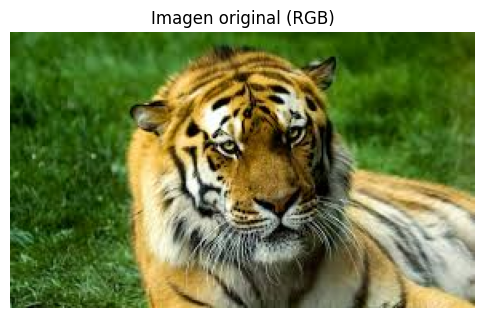

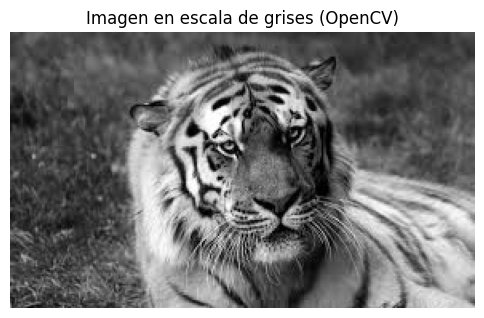

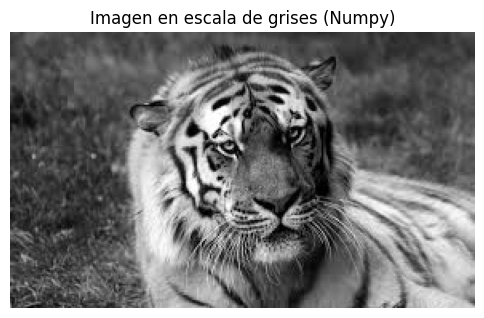

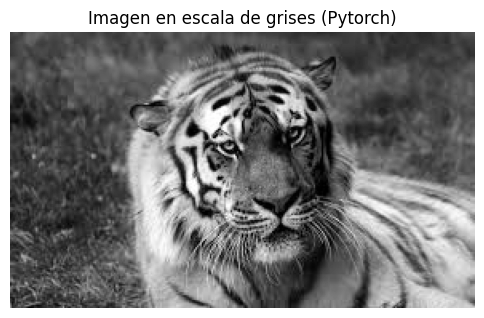

In [ ]:
import numpy as np
import cv2
import torch
from matplotlib import pyplot as plt
import torch.nn as nn
import torchvision.transforms as transforms
from matplotlib.image import imread

# Cargar imagen 
img_bgr = cv2.imread('image.jpg')  # OpenCV carga en formato BGR
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # Convertir a RGB para visualizar

# Mostrar imagen original
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title('Imagen original (RGB)')
plt.axis('off')
plt.show()

# Escala de grises con OpenCV 
img_gray_cv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Escala de grises con Numpy 
img_np = img_rgb.astype(float)
img_gray_np = (0.2989 * img_np[:, :, 0] + 0.5870 * img_np[:, :, 1] + 0.1140 * img_np[:, :, 2]).astype(np.uint8)

# Escala de grises con Pytorch 
img_torch = torch.tensor(img_rgb, dtype=torch.float32) / 255.0
weights = torch.tensor([0.2989, 0.5870, 0.1140])
img_gray_torch = torch.tensordot(img_torch, weights, dims=([2], [0])).numpy()
img_gray_torch = (img_gray_torch * 255).astype(np.uint8)

# Guardar una de las versiones en escala de grises 
cv2.imwrite('imagen_gris.jpg', img_gray_cv)  

# Mostrar la imagen transformada Opencv
plt.figure(figsize=(6, 6))
plt.imshow(img_gray_cv, cmap='gray')
plt.title('Imagen en escala de grises (OpenCV)')
plt.axis('off')
plt.show()

# Mostrar la imagen transformada Numpy
plt.figure(figsize=(6, 6))
plt.imshow(img_gray_np, cmap='gray')
plt.title('Imagen en escala de grises (Numpy)')
plt.axis('off')
plt.show()

# Mostrar la imagen transformada Pytorch
plt.figure(figsize=(6, 6))
plt.imshow(img_gray_torch, cmap='gray')
plt.title('Imagen en escala de grises (Pytorch)')
plt.axis('off')
plt.show()



## 2. Multiples operaciones con tensores
### ¡USA LA IMAGEN ADJUNTA image.png!

#### 2.1 Aplica una transformación puntual. Modifica el valor de los pixeles considerando un valor de umbral (threshold). la función de treshold debe ser una rampa con una pendiente dada (tu defines el valor de la pendiente) y cuyo valor mínimo será 0 y el máximo será 255 (valores típicos de los pixeles).

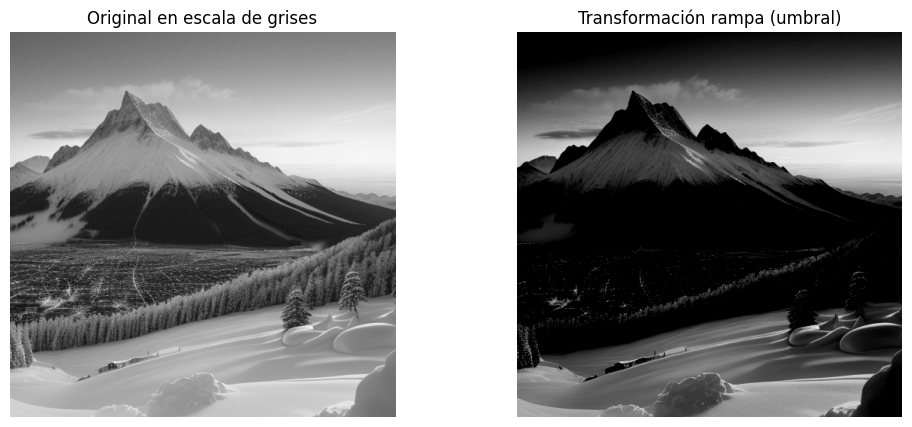

True

In [2]:

# Cargar imagen
img_color = cv2.imread('image.png')
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Parámetros de la función rampa
T = 100   # Umbral
m = 1.5   # Pendiente

# Función rampa con saturación a 255
img_ramp = np.where(img_gray < T, 0, m * (img_gray - T))
img_ramp = np.clip(img_ramp, 0, 255).astype(np.uint8)

# Mostrar imágenes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original en escala de grises')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_ramp, cmap='gray')
plt.title('Transformación rampa (umbral)')
plt.axis('off')

plt.show()

# Guardar resultado
cv2.imwrite("image_rampa.png", img_ramp)


#### 2.2 Aplica una transformación en la vecindad. 
- Debes hacer una vecindad con dimensiones de 5x5 pixeles. 
- Aplica la transformación de tal forma que los pixeles cambien para tener el valor correspondiente al máximo de todos los vecinos.
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.



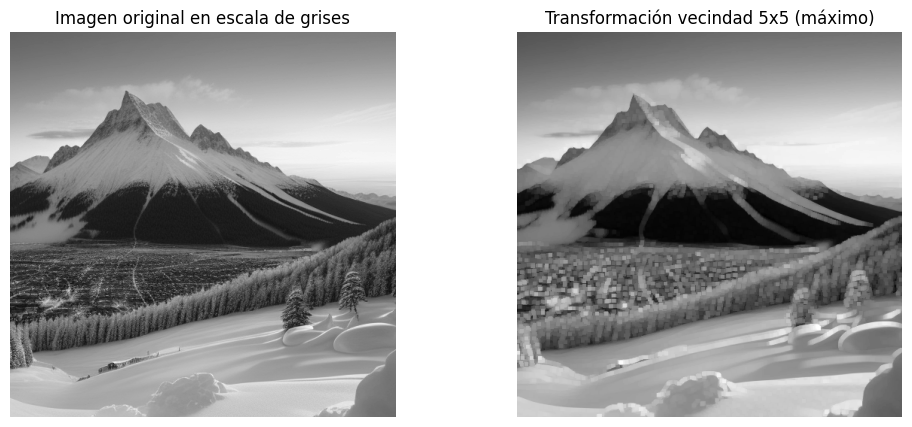

True

In [ ]:


# Cargar imagen y convertir a escala de grises
img_color = cv2.imread('image.png')
gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Dimensión de la vecindad
k = 5
pad = k // 2

# Padding de bordes para evitar errores en los bordes
padded = np.pad(gray, pad, mode='constant', constant_values=0)

# Crear imagen de salida vacía
output = np.zeros_like(gray)

# Aplicar filtro máximo manualmente 
for i in range(output.shape[0]):
    for j in range(output.shape[1]):
        neighborhood = padded[i:i+k, j:j+k]
        output[i, j] = np.max(neighborhood)

# Mostrar imágenes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Imagen original en escala de grises')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output, cmap='gray')
plt.title('Transformación vecindad 5x5 (máximo)')
plt.axis('off')

plt.show()

# Guardar resultado
cv2.imwrite('image_max_5x5.png', output)


#### 2.3 Aplica transformación de intensidad
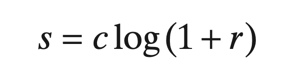
- Debes hacer una vecindad con dimensiones de 10x10 pixeles. 
- Aplica la transformación que aparece en la ecuación de tal forma que los pixeles cambien dependiendo de la posición (r) y el coeficiente c (de tu elección).
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.

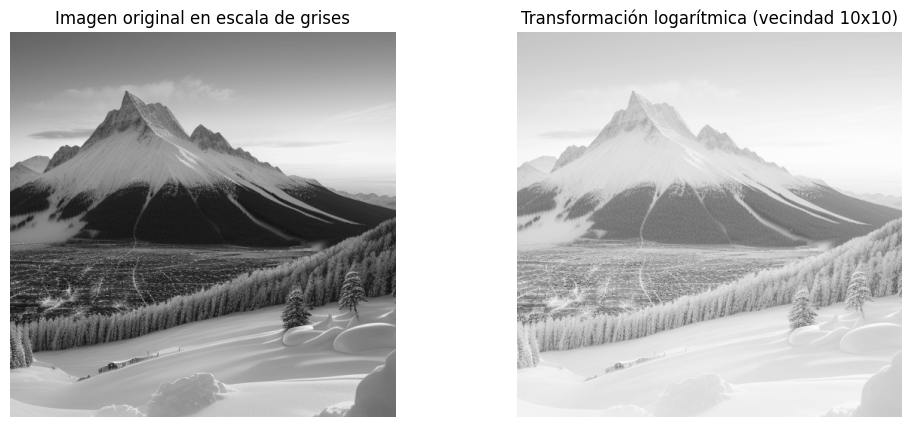

True

In [ ]:


# Cargar y convertir a escala de grises
img_color = cv2.imread('image.png')
gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Parámetros
k = 10      # Tamaño de la vecindad
pad = k // 2
c = 40.0    # Coeficiente

# Padding de la imagen para bordes
padded = np.pad(gray, pad, mode='constant', constant_values=0)

# Imagen de salida
output = np.zeros_like(gray, dtype=np.uint8)

# Recorrer la imagen y aplicar transformación logarítmica por vecindad
for i in range(output.shape[0]):
    for j in range(output.shape[1]):
        neighborhood = padded[i:i+k, j:j+k]
        transformed = c * np.log1p(neighborhood.astype(np.float32))  
        output[i, j] = np.clip(transformed[pad, pad], 0, 255)

# Mostrar imágenes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Imagen original en escala de grises')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output, cmap='gray')
plt.title('Transformación logarítmica (vecindad 10x10)')
plt.axis('off')

plt.show()

# Guardar resultado
cv2.imwrite('image_log_10x10.png', output)


#### 2.4 Operación con Kernel
- Realiza tres operaciones de convolución en cascada. 
- Utiliza torch nn.Conv2d
- Debes calcular el stride, padding y demás parámetros para que obtengas 16 canales de salida.
- Muestra una imagen de cada canal resultante de la convolución.

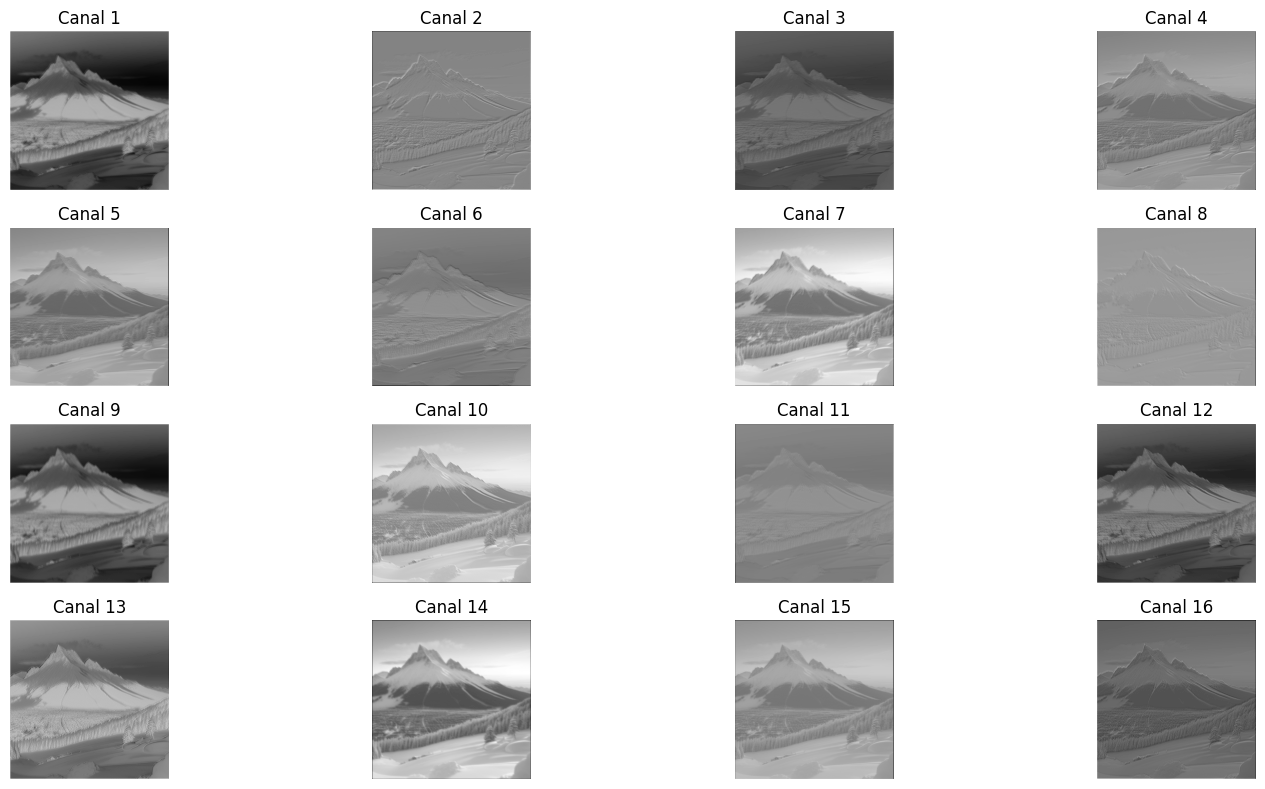

In [5]:

# Cargar imagen y convertir a escala de grises
img = cv2.imread('image.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convertir a tensor [1, 1, H, W]
transform = transforms.Compose([
    transforms.ToTensor(),  # Escala automáticamente a [0,1] y pone canales primero
])
input_tensor = transform(gray).unsqueeze(0)  # shape: [1, 1, H, W]

# Dimensiones originales
_, _, H, W = input_tensor.shape

# Definir tres capas de convolución
conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)   # misma resolución
conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)  # misma resolución
conv3 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1) # misma resolución

# Aplicar convoluciones
with torch.no_grad():
    x1 = conv1(input_tensor)  # [1, 8, H, W]
    x2 = conv2(x1)            # [1, 16, H, W]
    x3 = conv3(x2)            # [1, 16, H, W]

# Mostrar los 16 canales de salida de la última capa
x3_np = x3.squeeze(0).numpy()  # shape: [16, H, W]

plt.figure(figsize=(16, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    channel_img = x3_np[i]
    # Normalizar para visualización
    channel_img = (channel_img - channel_img.min()) / (channel_img.max() - channel_img.min() + 1e-6)
    plt.imshow(channel_img, cmap='gray')
    plt.title(f'Canal {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## 3. Realiza la inversión de imagen

### 3.1 Utilizando estrictamente numpy, busca y usa una imagen binaria y realizar la inversión de dicha imagen.
### Recuerda adjuntar la imagen a la entrega de tu trabajo.


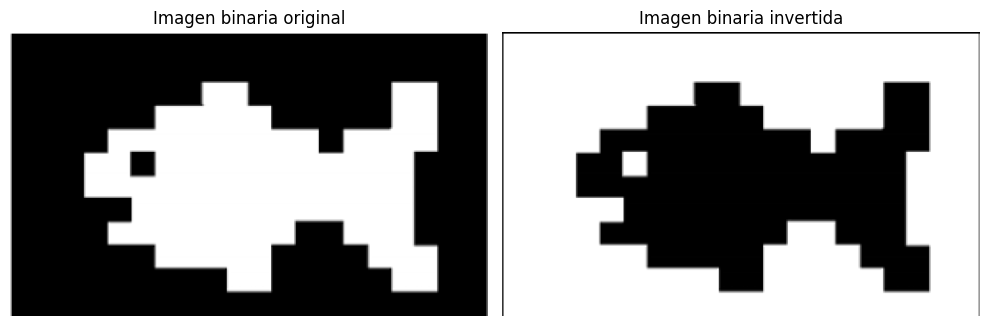

In [ ]:
# Cargar imagen
ruta_imagen = 'download.png'  
imagen = imread(ruta_imagen)


# Si viene normalizada [0, 1], convertir a 0 y 255
if imagen.max() <= 1.0:
    imagen = (imagen * 255).astype(np.uint8)
else:
    imagen = imagen.astype(np.uint8)

# Si la imagen tiene 3 canales (RGB), convertir a escala de grises
if imagen.ndim == 3:
    imagen = imagen[:, :, 0]  # Solo el primer canal

# === Invertir imagen binaria ===
imagen_invertida = 255 - imagen

# === Mostrar resultado ===
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title("Imagen binaria original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_invertida, cmap='gray')
plt.title("Imagen binaria invertida")
plt.axis('off')

plt.tight_layout()
plt.show()


### 3.1 Usando Pytorch y opencv, realiza la inversión de la misma imagen.



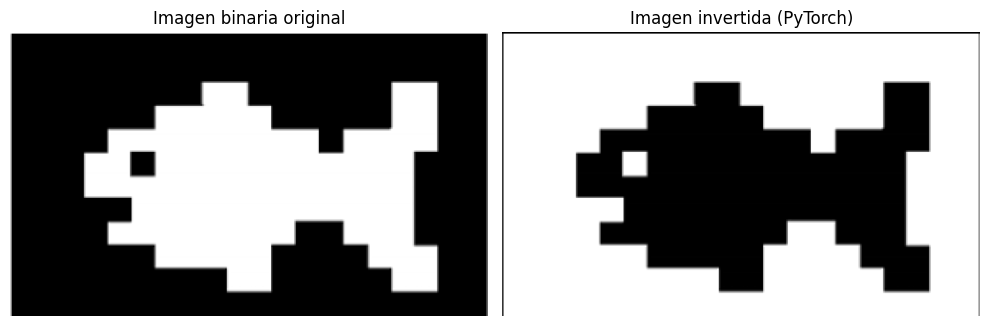

True

In [ ]:

# Paso 1: Cargar imagen binaria (debe tener valores 0 y 255) 
ruta_imagen = 'download.png'  # reemplaza con tu imagen real
imagen_cv = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)  # leer en escala de grises

# Paso 2: Convertir a tensor PyTorch 
imagen_tensor = torch.from_numpy(imagen_cv).float()

# Paso 3: Invertir imagen binaria: 0 a 255 
imagen_invertida_tensor = 255.0 - imagen_tensor

# Paso 4: Convertir de vuelta a NumPy para visualización/guardar
imagen_invertida = imagen_invertida_tensor.numpy().astype(np.uint8)

# Mostrar original e invertida 
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen_cv, cmap='gray')
plt.title("Imagen binaria original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_invertida, cmap='gray')
plt.title("Imagen invertida (PyTorch)")
plt.axis('off')

plt.tight_layout()
plt.show()

# Guardar imagen invertida
cv2.imwrite('imagen_binaria_invertida.png', imagen_invertida)


## 4. Segmentación de imagen
#### 4.1 Realiza un algoritmo para dividir una imagen con 3 canales RGB de 512x512, en parches (secciones) de 16x16. Presenta cada parche generado de la imagen.
El algoritmo debe tolerar el cambio de imagen por una de menor tamano (128, 64). Claramente, en cada caso el número de parches será menor. 
    

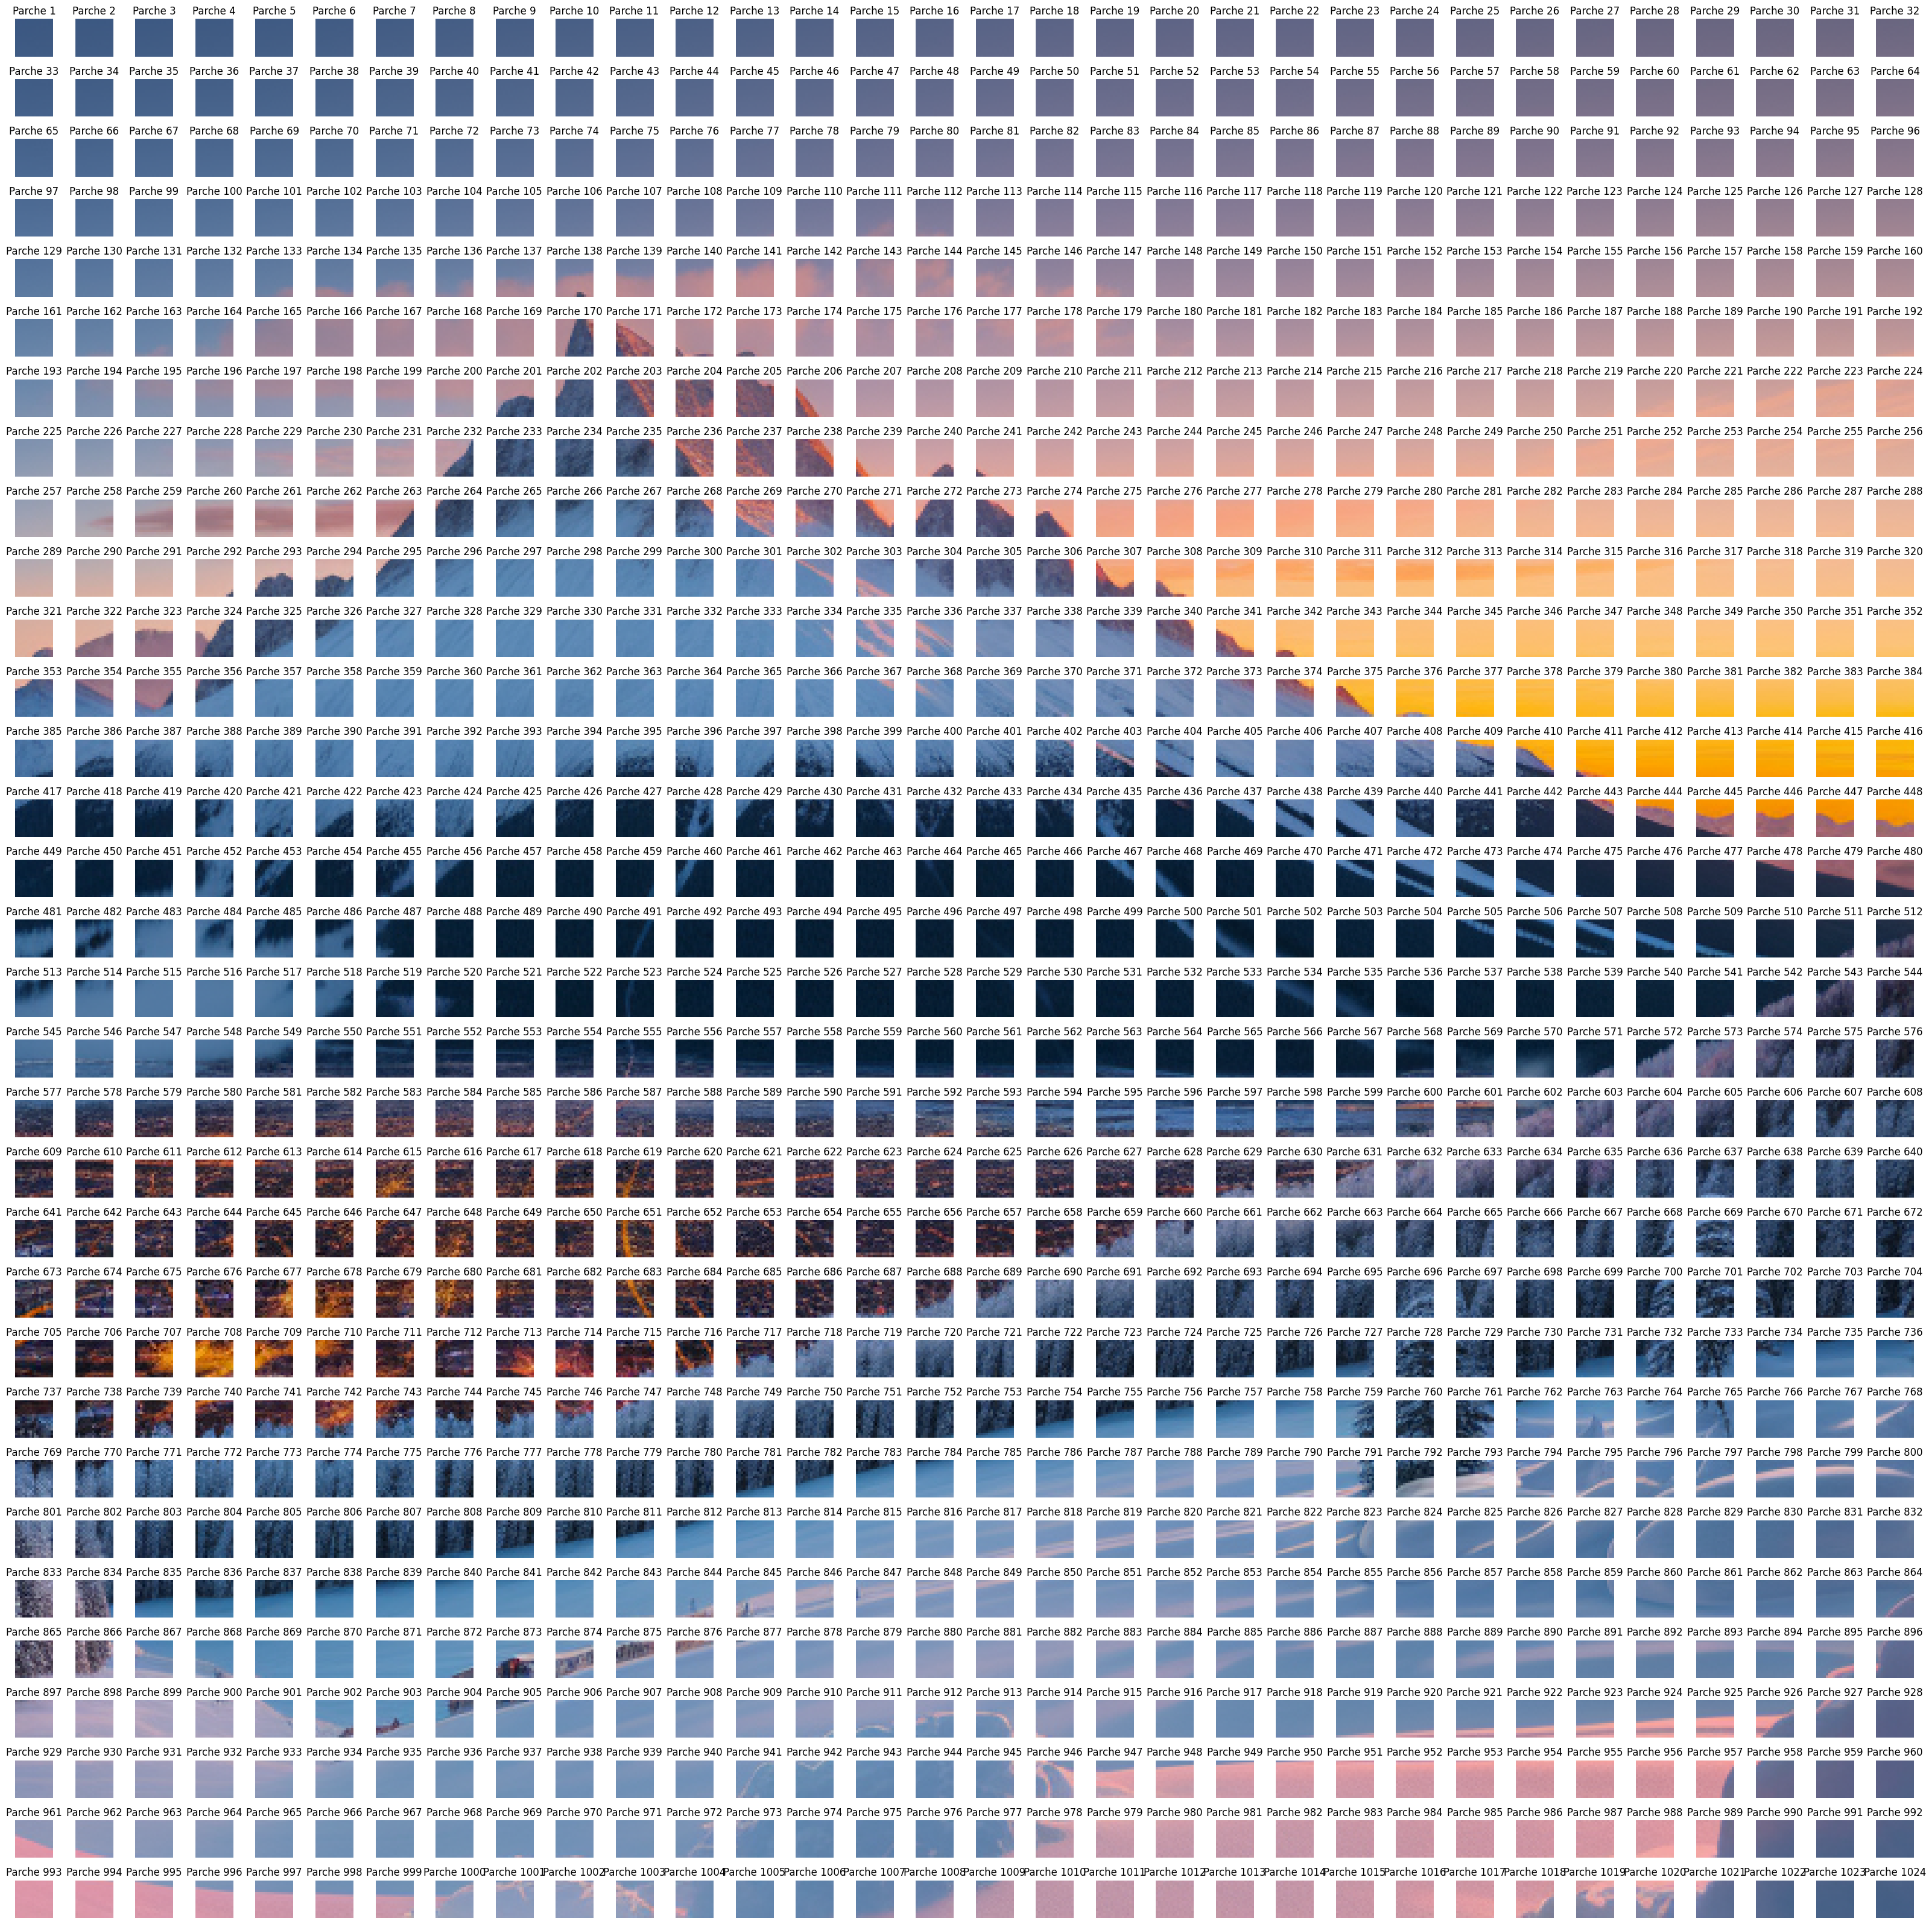

In [ ]:

def dividir_en_parches(imagen_rgb, tamaño_parche=16):
    h, w, c = imagen_rgb.shape
    parches = []
    
    for i in range(0, h - tamaño_parche + 1, tamaño_parche):
        for j in range(0, w - tamaño_parche + 1, tamaño_parche):
            parche = imagen_rgb[i:i+tamaño_parche, j:j+tamaño_parche, :]
            parches.append(parche)
    
    return parches


imagen = imread('image.png')  
imagen = (imagen * 255).astype(np.uint8) if imagen.max() <= 1.0 else imagen.astype(np.uint8)

# Verificar que es RGB
if imagen.ndim != 3 or imagen.shape[2] != 3:
    raise ValueError("La imagen debe tener 3 canales (RGB)")

# Generar parches
parches = dividir_en_parches(imagen, tamaño_parche=16)

# Mostrar todos los parches 
cols = 32  # Número de columnas para mostrar (ajustable) 32 para imagen en orden
rows = int(np.ceil(len(parches) / cols))

plt.figure(figsize=(32, rows * 1))
for idx, parche in enumerate(parches):
    plt.subplot(rows, cols, idx + 1)
    plt.imshow(parche)
    plt.title(f'Parche {idx+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## 5. Referencias
<p align="justify">
    
[OpenCV] https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html

[inversion] https://medium.com/analytics-vidhya/inverting-an-image-using-numpys-broadcasting-method-1f5beb7f9fa5#:~:text=In%20order%20to%20invert%20the,negation)%20operation%20to%20the%20image.
